In [71]:

import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create a connection to the postgresql database
connection = pg.connect("host='127.0.0.1' dbname=EmployeeSQL user=postgres password='941231'")

# create dataframes for salaries and title
salaries = pd.read_sql_query('select emp_no, salary from salaries',connection)
titles = pd.read_sql_query('select emp_no, title from titles',connection)

In [72]:
# create a group by function
salarytitle_df = pd.merge(titles, salaries, on=['emp_no'])
#salarytitle_df.head()
salarytitlegrouped_df = salarytitle_df.groupby(['title'])['salary'].mean()
salarytitlegrouped_df = salarytitlegrouped_df.reset_index()

salarytitlegrouped_df.head()


,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


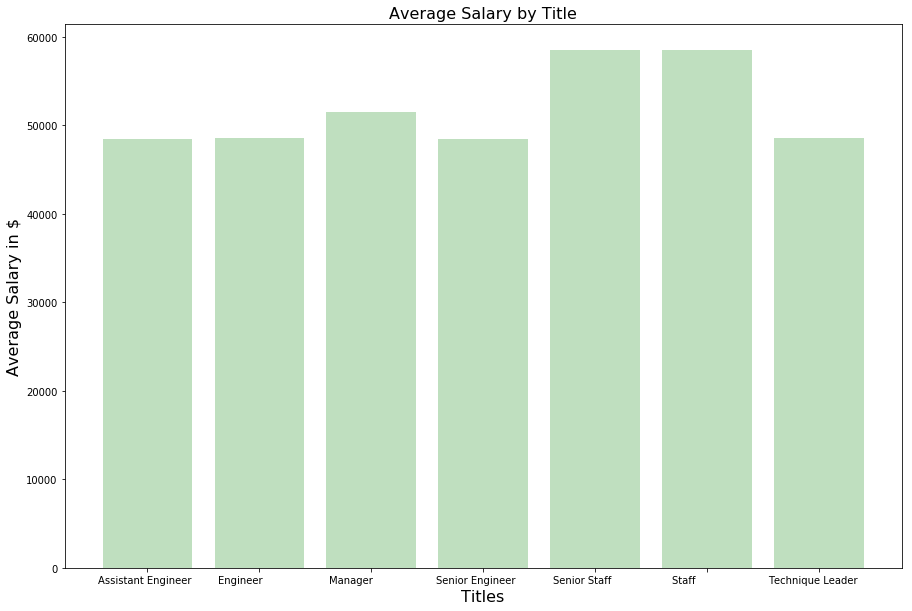

In [73]:
# define x axis, y axis, width and fig size
x_axis=salarytitlegrouped_df["title"]
y_axis=salarytitlegrouped_df["salary"]
#width = 0.5
fig,ax = plt.subplots(figsize=(15,10))

# create barchart using x values, y values
plt.bar(x_axis, y_axis, color='green', alpha=0.25, align='center')

# define tick locations and values for x axis, y axis and title
plt.xlabel('Titles', size=16)
plt.ylabel('Average Salary in $', size=16)
plt.title('Average Salary by Title', size=16)
#plt.show()
plt.savefig("Salary by Title.png")